In [1]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]


In [2]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    
df=pd.DataFrame(te_ary, columns=te.columns_)  
df


,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


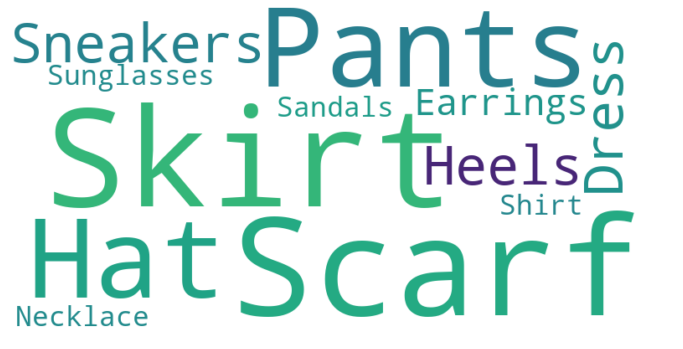

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([' '.join(item) for item in dataset])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


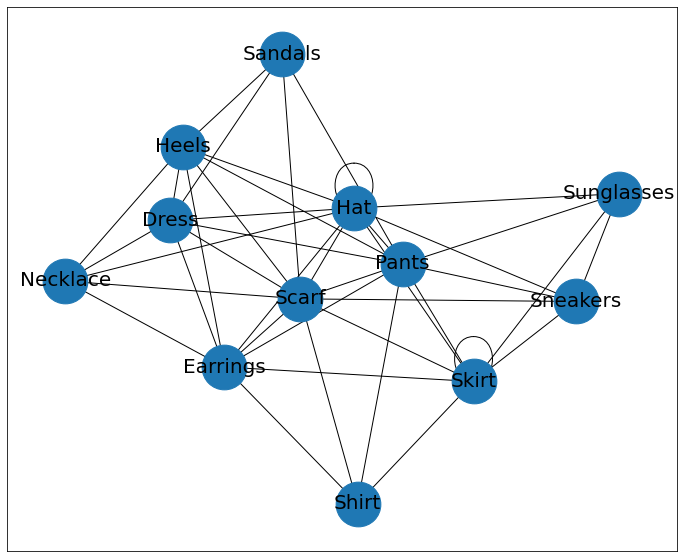

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for transaction in dataset:
    for item in transaction:
        G.add_node(item)

for transaction in dataset:
    for i in range(len(transaction)):
        for j in range(i+1, len(transaction)):
            G.add_edge(transaction[i], transaction[j])

plt.figure(figsize=(12, 10))
nx.draw_networkx(G, with_labels=True, node_size=2000, font_size=20)
plt.show()


In [5]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.4)

,support,itemsets
0,0.4,(0)
1,0.4,(1)
2,0.6,(2)
3,0.4,(3)
4,0.8,(5)
5,0.8,(7)
6,0.6,(9)
7,0.4,(10)
8,0.4,"(0, 3)"
9,0.4,"(0, 7)"


In [6]:
frequent_itemsets=apriori(df, min_support=0.4, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.8,(Pants)
5,0.8,(Scarf)
6,0.6,(Skirt)
7,0.4,(Sneakers)
8,0.4,"(Heels, Dress)"
9,0.4,"(Scarf, Dress)"


In [7]:
from mlxtend.frequent_patterns import association_rules 
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Heels),(Dress),0.4,0.4,0.4,1.00,2.500000,0.24,inf
1,(Dress),(Heels),0.4,0.4,0.4,1.00,2.500000,0.24,inf
2,(Dress),(Scarf),0.4,0.8,0.4,1.00,1.250000,0.08,inf
3,(Earrings),(Scarf),0.4,0.8,0.4,1.00,1.250000,0.08,inf
4,(Sneakers),(Hat),0.4,0.6,0.4,1.00,1.666667,0.16,inf
5,(Heels),(Scarf),0.4,0.8,0.4,1.00,1.250000,0.08,inf
6,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
7,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
8,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
9,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.250000,0.12,inf


In [8]:
#Let's do the same checkpoint but with a bigger dataset!

In [12]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx

df = pd.read_csv(r"C:\Users\TOSHIBA\Downloads\Market_Basket_Optimisation.csv", header=None)

transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.iloc[i,j]) for j in range(len(df.columns)) if str(df.iloc[i,j]) != 'nan'])

te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)    
df=pd.DataFrame(te_ary, columns=te.columns_)  
df


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


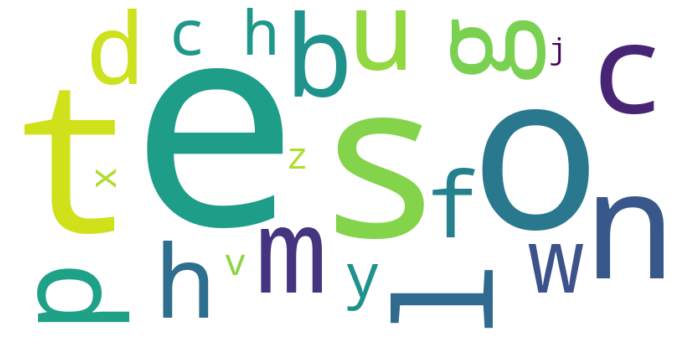

In [13]:
text = ' '.join([' '.join(item) for item in df])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

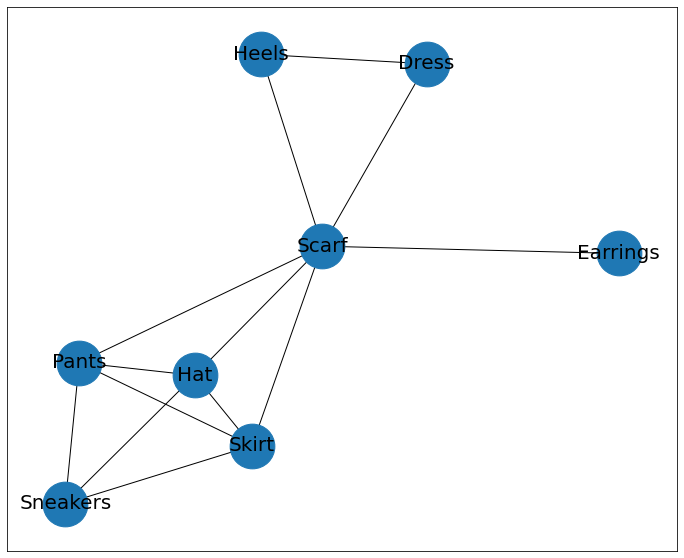

In [14]:
G = nx.Graph()
for itemset in frequent_itemsets['itemsets']:
    for item in itemset:
        G.add_node(item)
for itemset in frequent_itemsets['itemsets']:
    items = list(itemset)
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            G.add_edge(items[i], items[j])
plt.figure(figsize=(12, 10))
nx.draw_networkx(G, with_labels=True, node_size=2000, font_size=20)
plt.show()

In [19]:
apriori(df, min_support=0.05, use_colnames=True)

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [32]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
